In [596]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import NearMiss
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [597]:
loan = pd.read_csv('train_LTFS.csv')

In [598]:
loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [599]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

# EDA and Data Cleaning

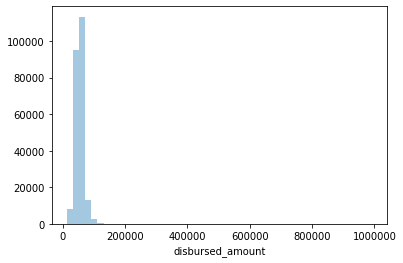

In [600]:
sns.distplot(loan['disbursed_amount'], kde=False)

***From the above histogram, distribution of disbursed amount is rightly skewed. It means there are outliers in this dataset which negatively effect the learning ability of the model. Hence, few entries will be removed from the dataset whcih falls below and above the lower bounda and upper bound of disbursed amount.***

In [601]:
#Finding outliers
loan_disbursed = sorted(loan['disbursed_amount'])
q1,q3 = np.percentile(loan_disbursed,(25,75))
print('Q1 is: ',q1,'\nQ3 is: ', q3)
IQR = q3-q1
print('IQR is:',IQR)
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)
print('Lower Bound is: ',lower_bound,'\nUpper Bound is: ', upper_bound)

Q1 is:  47145.0 
Q3 is:  60413.0
IQR is: 13268.0
Lower Bound is:  27243.0 
Upper Bound is:  80315.0


In [602]:
#Re-defining dataset with no outliers
loan_upper = loan[loan['disbursed_amount'] < upper_bound]
loan = loan_train_upper[loan_train_upper['disbursed_amount'] > lower_bound]

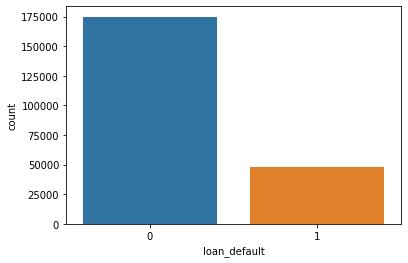

In [603]:
sns.countplot(data=loan, x='loan_default')

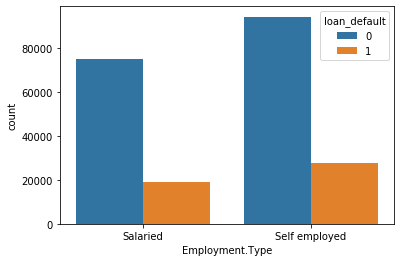

In [604]:
sns.countplot(data=loan, x='Employment.Type', hue='loan_default')

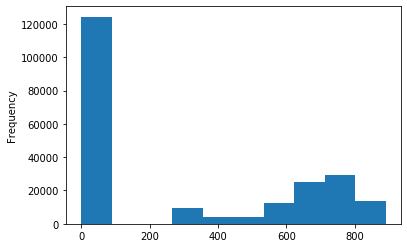

In [605]:
loan['PERFORM_CNS.SCORE'].plot.hist()

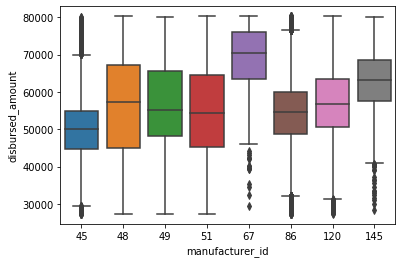

In [606]:
sns.boxplot(data=loan, x='manufacturer_id', y='disbursed_amount')

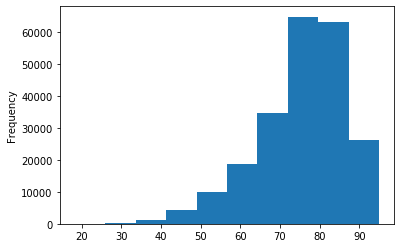

In [607]:
loan['ltv'].plot.hist()

<Figure size 1152x720 with 0 Axes>

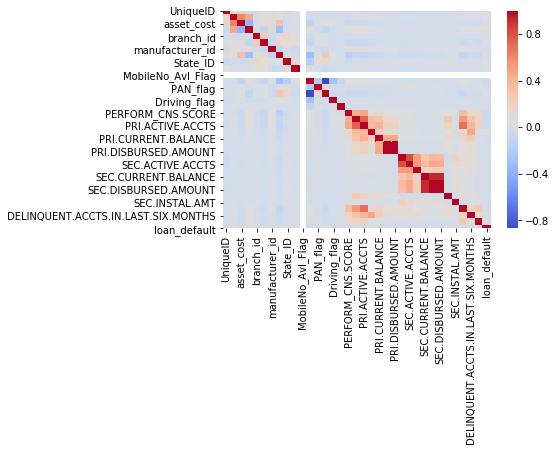

<Figure size 1152x720 with 0 Axes>

In [608]:
sns.heatmap(data=loan.corr(), cmap='coolwarm' )
plt.figure(figsize=(16,10))

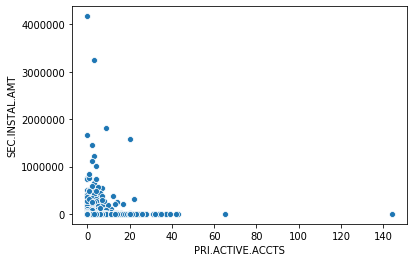

In [609]:
sns.scatterplot(data=loan, x='PRI.ACTIVE.ACCTS', y='SEC.INSTAL.AMT')

In [610]:
#Unique count of ID
print('UniqueID count is:', len(loan['UniqueID'].unique()))
print('branch_id count is:', len(loan['branch_id'].unique()))
print('supplier_id count is:', len(loan['supplier_id'].unique()))
print('manufacturer_id count is:', len(loan['manufacturer_id'].unique()))
print('Current_pincode_ID count is:', len(loan['Current_pincode_ID'].unique()))
print('State_ID count is:', len(loan['State_ID'].unique()))
print('Employee_code_ID count is:', len(loan['Employee_code_ID'].unique()))

UniqueID count is: 223285
branch_id count is: 82
supplier_id count is: 2886
manufacturer_id count is: 8
Current_pincode_ID count is: 6635
State_ID count is: 22
Employee_code_ID count is: 3265


In [611]:
#Category-wise count of Flags
loan['MobileNo_Avl_Flag'].value_counts()

1    223285
Name: MobileNo_Avl_Flag, dtype: int64

***As mobile no is available for every individual, therefore model won't learn anything from this variable. Hence, this column has to be removed.***

In [612]:
loan.drop('MobileNo_Avl_Flag',axis=1,inplace=True)

C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [613]:
loan.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7127
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

***It can be seen above that 7127 entries of employment type (i.e., Salaried/Self-Employed) of the people who have taken vehicle loans is missing. As this is a categorical variable, therefore its correlation with other variable cant be known by plotting a heatmap with correlation coefficients. It contributed as a 3% of the total entries in this dataset which doesn't much effect the learning ability of the model. Since no other relation is present to fill these NULL entries, therefore these entries will be dropped from the dataset so that the machine learning models can be applied.***

In [614]:
loan.dropna(inplace=True)

C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Feature Engineering

In [615]:
#Creating dummy variable of categorrical columns to cater it in model building
d_self_employed = pd.get_dummies(loan['Employment.Type'], drop_first=True)
d_manu_id = pd.get_dummies(loan['manufacturer_id'], drop_first=True)

#Changing the data type to DateTime of Date of Birth of people taking vehicle loan
loan['Date.of.Birth'] = pd.to_datetime(loan['Date.of.Birth'])
#Fetching Day, Month and Year
loan['DOB_Day'] = loan['Date.of.Birth'].apply(lambda x: x.day)
loan['DOB_Month'] = loan['Date.of.Birth'].apply(lambda x: x.month)
loan['DOB_Year'] = loan['Date.of.Birth'].apply(lambda x: x.year)
#Changing the data type to DateTime of Disbursal Date of loan given to peple
loan['DisbursalDate'] = pd.to_datetime(loan['DisbursalDate'])
#Fetching Day, Month and Year for Disbursal Date
loan['Disbursed_Day'] = loan['DisbursalDate'].apply(lambda x: x.day)
loan['Disbursed_Month'] = loan['DisbursalDate'].apply(lambda x: x.month)
loan['Disbursed_Year'] = loan['DisbursalDate'].apply(lambda x: x.year)
#Fetching years and month from average account age
loan['AVERAGE.ACCT.YRS'] = loan['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])
loan['AVERAGE.ACCT.MON'] = loan['AVERAGE.ACCT.AGE'].apply(lambda x: x.split()[1])
loan['AVERAGE.ACCT.MON'] = loan['AVERAGE.ACCT.MON'].apply(lambda x: x.split('mon')[0])
#Fetching years and month from credit history length
loan['CREDIT.HISTORY.YRS'] = loan['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
loan['CREDIT.HISTORY.MON'] = loan['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split()[1])
loan['CREDIT.HISTORY.MON'] = loan['CREDIT.HISTORY.MON'].apply(lambda x: x.split('mon')[0])
loan['AVERAGE.ACCT.MON'] = pd.to_numeric(loan['AVERAGE.ACCT.MON'])
loan['CREDIT.HISTORY.MON'] = pd.to_numeric(loan['CREDIT.HISTORY.MON'])

#Dropping of columns which is not required now to train the model
loan.drop(['manufacturer_id','Employment.Type','Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
                 'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.YRS', 'CREDIT.HISTORY.YRS'], axis=1, inplace=True)
loan = pd.concat([loan, d_self_employed, d_manu_id], axis=1)
loan.head()

C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,DOB_Day,DOB_Month,DOB_Year,Disbursed_Day,Disbursed_Month,Disbursed_Year,AVERAGE.ACCT.MON,CREDIT.HISTORY.MON,Self employed,48,49,51,67,86,120,145
0,420825,50578,58400,89.55,67,22807,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1984,8,3,2018,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,1502,6,1998,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,31,7,1985,26,9,2018,11,11,1,0,0,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,8,1985,8,1,2018,0,0,1,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,1501,6,1998,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,30,12,1993,26,10,2018,8,3,1,0,0,0,0,0,0,0
4,539055,52378,60300,88.39,67,22807,1495,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12,9,1977,26,9,2018,0,0,1,0,0,0,0,0,0,0


In [592]:
#Checking VIF to remove multi-collinearity
for i in range(0,len(loan.columns)-1):
    print('VIF of {} column is: {} '.format(loan.drop(['loan_default'], axis=1).columns[i],variance_inflation_factor(loan.drop(['loan_default'], axis=1).values, i)))

VIF of UniqueID column is: 1.6644308813226492 
VIF of disbursed_amount column is: 30.080871650152663 
VIF of asset_cost column is: 27.102639555040533 
VIF of ltv column is: 20.642363256505647 
VIF of branch_id column is: 1.1018251735764202 
VIF of supplier_id column is: 1.1621221093100091 
VIF of Current_pincode_ID column is: 1.4094386926078313 
VIF of State_ID column is: 1.124733848398382 
VIF of Employee_code_ID column is: 1.0581747507092651 
VIF of Aadhar_flag column is: 8.158425522876831 
VIF of PAN_flag column is: 1.0785465140837691 
VIF of VoterID_flag column is: 7.1743181347937375 
VIF of Driving_flag column is: 1.8642604326817678 
VIF of Passport_flag column is: 1.0818413808342797 
VIF of PERFORM_CNS.SCORE column is: 2.475947336483031 
VIF of PRI.NO.OF.ACCTS column is: 2.479472746855276 
VIF of PRI.ACTIVE.ACCTS column is: 4.271002355022983 
VIF of PRI.OVERDUE.ACCTS column is: 1.51195124312265 
VIF of PRI.CURRENT.BALANCE column is: 1.543856777285161 
VIF of PRI.SANCTIONED.AMOUNT

***If Variance Inflation Factor (i.e., VIF) is very high for two or more variables, then any one of the variables is needed to be removed to reduce the multicollinearity. From the above output, 5 features are multi-collinear which are being dropped from the dataset in below cell.***

In [616]:
#To remove multicollinearity in dataset
loan.drop(['ltv','Aadhar_flag','PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE','SEC.DISBURSED.AMOUNT','Disbursed_Year'], axis=1, inplace=True)

# Applying Logistic Regression by resolving Class Imbalance

In [617]:
#Resolving class imbalance by undersampling
x = loan.drop('loan_default', axis=1)
y = loan['loan_default']
nm = NearMiss()
x_balanced, y_balanced = nm.fit_sample(x,y)
#Normalize the training dataset
x_balanced = preprocessing.scale(x_balanced)
x_balanced.shape, y_balanced.shape

((93830, 42), (93830,))

In [618]:
#Dividing the dataset into train and test set with 70% in the training set
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.3,random_state=101)
logmodel = LogisticRegression()
#Fitting the Logistic regression model
logmodel.fit(x_train, y_train)
prediction_log = logmodel.predict(x_test)
#Metrics to know performance of model
print('Classification Report: ')
print(classification_report(y_test, prediction_log))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, prediction_log))

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.92      0.77     14145
           1       0.87      0.52      0.66     14004

    accuracy                           0.73     28149
   macro avg       0.77      0.72      0.71     28149
weighted avg       0.77      0.73      0.71     28149

Confusion Matrix: 
[[13077  1068]
 [ 6653  7351]]


C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC_score of Logistic Regression is: 0.7247088697275705


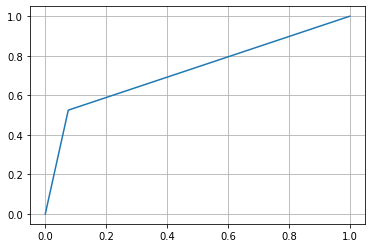

In [619]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_log)
plt.plot(fpr,tpr)
plt.grid(True)
#Checking AUC score for modelling
print('AUC_score of Logistic Regression is:',roc_auc_score(y_test, prediction_log))

# Decision Tree

In [620]:
#Applying decision tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
prediction_dtree = dtree.predict(x_test)

#Metrics to know performance of model
print('Classification Report: ')
print(classification_report(y_test,prediction_dtree))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,prediction_dtree))

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.66      0.67     14145
           1       0.67      0.69      0.68     14004

    accuracy                           0.68     28149
   macro avg       0.68      0.68      0.68     28149
weighted avg       0.68      0.68      0.68     28149

Confusion Matrix: 
[[9363 4782]
 [4333 9671]]


AUC_score of Decision Tree is:  0.6762592069588965


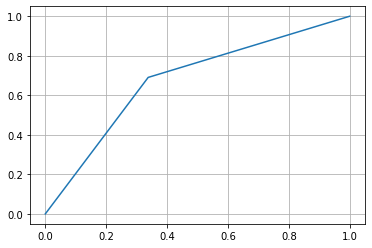

In [621]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_dtree)
plt.plot(fpr,tpr)
plt.grid(True)
#Checking AUC score for modelling
print('AUC_score of Decision Tree is: ',roc_auc_score(y_test, prediction_dtree))

# Random Forest

In [622]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
prediction_rfc = rf.predict(x_test)
#Metrics to know performance of model
print('Classification Report: ')
print(classification_report(y_test,prediction_rfc))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,prediction_rfc))

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.89      0.79     14145
           1       0.85      0.62      0.72     14004

    accuracy                           0.76     28149
   macro avg       0.78      0.76      0.75     28149
weighted avg       0.78      0.76      0.75     28149

Confusion Matrix: 
[[12591  1554]
 [ 5299  8705]]


AUC_score of Random Forest is:  0.7558729849341637


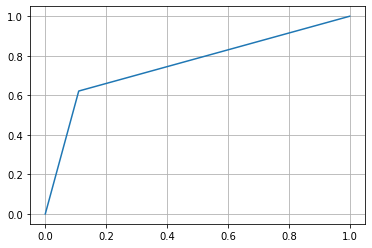

In [623]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_rfc)
plt.plot(fpr,tpr)
plt.grid(True)
#Checking AUC score for modelling
print('AUC_score of Random Forest is: ',roc_auc_score(y_test, prediction_rfc))

In [624]:
pd.set_option('display.max_columns',None)
rf_feature_imp = pd.DataFrame([np.sort(rf.feature_importances_),loan.columns])
rf_feature_imp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.37363e-05,7.74392e-05,0.000202572,0.000246388,0.000357151,0.00109625,0.00145741,0.00152701,0.00217202,0.00223477,0.00230794,0.00264001,0.00358089,0.00372238,0.00436864,0.00565209,0.00618118,0.00669484,0.00682576,0.00715366,0.0076098,0.00919636,0.0149892,0.0162541,0.0195374,0.0237424,0.0299054,0.030134,0.0302247,0.0304621,0.0386797,0.0393175,0.0419535,0.0546596,0.0548361,0.056243,0.058339,0.064777,0.065433,0.067769,0.092568,0.094858,NaN
1,UniqueID,disbursed_amount,asset_cost,branch_id,supplier_id,Current_pincode_ID,State_ID,Employee_code_ID,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,DOB_Day,DOB_Month,DOB_Year,Disbursed_Day,Disbursed_Month,AVERAGE.ACCT.MON,CREDIT.HISTORY.MON,Self employed,48.000000,49.000000,51.000000,67.000000,86.000000,120.000000,145.0


***From above feature importance values, it can be seen that parmeters which are more dependent on loan default. It needs to be ensured by the front-end features where user will be entering the values. High importance variables are needed to make compulsory for user to enter during data entry so that model can better predict the loan defaulters.***

# XGBoost Method

In [625]:
model_xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1)

In [626]:
x_xgb_train, x_xgb_test, y_xgb_train, y_xgb_test = train_test_split(x_balanced,
                                                    y_balanced,test_size=0.3,random_state=101)
model_xgb.fit(x_xgb_train, y_xgb_train)
prediction_xgb = model_xgb.predict(x_xgb_test)
#Metrics to know performance of model
print('Classification Report: ')
print(classification_report(y_xgb_test,prediction_xgb))
print('Confusion Matrix: ')
print(confusion_matrix(y_xgb_test,prediction_xgb))

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.90      0.79     14145
           1       0.86      0.63      0.73     14004

    accuracy                           0.76     28149
   macro avg       0.79      0.76      0.76     28149
weighted avg       0.79      0.76      0.76     28149

Confusion Matrix: 
[[12720  1425]
 [ 5191  8813]]


AUC_score of XG Boost is:  0.764288941229638


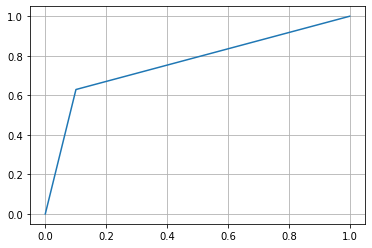

In [627]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_xgb)
plt.plot(fpr,tpr)
plt.grid(True)
#Checking AUC score for modelling
print('AUC_score of XG Boost is: ',roc_auc_score(y_test, prediction_xgb))

***Conclusion: XGBoost Model is the best model to be applied on this dataset due to high accuracy.***

***Application: This model can be used to predict the individual who is unable to pay the loan in the first installment. Once all the data of the customer is entered, model will tell with an accuracy of 77% that customer is going to pay back the loan or not. As the sanctioning the loan takes more time, therefore this model can act as a quick measure to speed up the process.***